# Playin with MNIST datasets

In [1]:
# Alternative local file loader (due to mldata.org being down)

from scipy.io import loadmat
mnist_raw = loadmat("mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [7]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
mnist['target']

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [10]:
X= mnist['data']

In [12]:
y=mnist['target']

In [8]:

# display example image

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [25]:
some_digit=X[50000]

In [26]:
some_digit=some_digit.reshape(28,28)

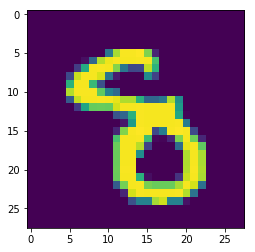

In [28]:
plt.imshow(some_digit)

In [29]:
#Lets see what this digit is in reality
y[50000]


8.0

Split the data into training and test set

In [68]:
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]

Now that we have data split into training and test, lets shuffle the data

In [69]:
import numpy as np

In [70]:
shuffled_index=np.random.permutation(60000)

In [71]:
shuffled_index

array([52449, 36473, 36948, ..., 18170, 32044, 40302])

In [72]:
X_train[shuffled_index],y_train[shuffled_index]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([ 8.,  6.,  6., ...,  2.,  5.,  6.]))

In [73]:
X_train=X_train[shuffled_index]

In [74]:
y_train=y_train[shuffled_index]

## Binary classifier

In [75]:

# Start by only trying to ID "six" digits.


In [109]:
y_train_8= (y_train==8)
y_test_8=(y_test==8)

In [77]:
# SGD classifier: good at handling large DBs
#                 also good at handling one-at-a-time learning

In [78]:
from sklearn.linear_model import SGDClassifier

In [79]:
sgd= SGDClassifier()

In [82]:
sgd.fit(X_train,y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [83]:
sgd.predict(X[50000])

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

In [ ]:
# Performance measure of this classifier

In [85]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = sgd, X = X_train, y = y_train_6, cv = 3)


In [86]:
accuracies

array([ 0.89275536,  0.8933    ,  0.89669483])

In [87]:
accuracies.mean()


0.89425006565787513

In [88]:
accuracies.std()

0.0017429533326452106

In [104]:
from sklearn.model_selection import cross_val_predict

# Generate cross-val'd predictions for each datapoint
y_train_pred = cross_val_predict(sgd, X_train, y_train_8, cv=3)

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_8, y_train_pred)

In [106]:
cm

array([[53405,   744],
       [ 3473,  2378]])

In [111]:
from sklearn.model_selection import cross_val_predict

# Generate cross-val'd predictions for each datapoint
y_test_pred = cross_val_predict(sgd, X_test, y_test_8, cv=3)

In [112]:
cm1 = confusion_matrix(y_test_8, y_test_pred)

In [113]:
cm1

array([[6534, 2492],
       [ 202,  772]])

# Classification metric- Precision and recall

Precision= Tp/TP+FP and Recall= TP/TP+FN


## precision, recall, f1 metrics
###  precision/recall tradeoff: increasing one reduces the other.

In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [116]:
precision_score(y_train_8,y_train_pred)

0.76169122357463159

In [117]:
recall_score(y_train_8,y_train_pred)

0.40642625192274823

In [118]:
f1_score(y_train_8,y_train_pred)

0.53003454808871053

### Using a function to determing precision and recall tradeoff

In [121]:
# start with getting decision scores instead of predictions.

y_scores = cross_val_predict(
    sgd, 
    X_train, 
    y_train_8, 
    cv=3,
    method="decision_function")


In [122]:
y_scores

array([ 139730.86283855, -490070.3252566 , -200884.52866566, ...,
       -556085.57071463, -161127.1121765 , -663727.80669004])

In [123]:
from sklearn.metrics import precision_recall_curve

In [125]:
precision,recall,thresholds=precision_recall_curve(y_train_8, y_scores)

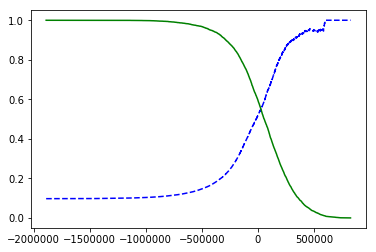

In [130]:
plt.plot(thresholds, 
             precision[:-1], 
             "b--", 
             label="Precision")
plt.plot(thresholds, 
             recall[:-1], 
             "g-", 
             label="Recall")


[0, 1, 0, 1]

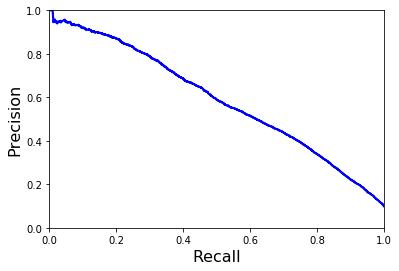

In [137]:
# plot precision vs recall to look for knee of the curve

plt.plot(recall, precision, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])


# ROC Curve

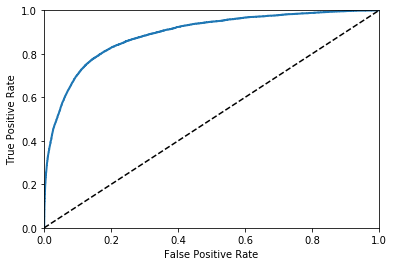

In [133]:
# ROC plots TRUE POSITIVE rate (TP = recall) vs FALSE POSITIVE rate. (FP = 1-specificity)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

# tradeoff: higher recall (TP) => more false positives produced.
# dotted line = purely random classifier results.